C:\Users\Roelo\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


[{'Teams': 'Manchester City', 'Wins': '27', 'Draws': '5', 'Losses': '6', 'Total Points': '86'}, {'Teams': 'Manchester United', 'Wins': '21', 'Draws': '11', 'Losses': '6', 'Total Points': '74'}, {'Teams': 'Liverpool', 'Wins': '20', 'Draws': '9', 'Losses': '9', 'Total Points': '69'}, {'Teams': 'Chelsea', 'Wins': '19', 'Draws': '10', 'Losses': '9', 'Total Points': '67'}, {'Teams': 'Leicester City', 'Wins': '20', 'Draws': '6', 'Losses': '12', 'Total Points': '66'}, {'Teams': 'West Ham United', 'Wins': '19', 'Draws': '8', 'Losses': '11', 'Total Points': '65'}, {'Teams': 'Tottenham Hotspur', 'Wins': '18', 'Draws': '8', 'Losses': '12', 'Total Points': '62'}, {'Teams': 'Arsenal', 'Wins': '18', 'Draws': '7', 'Losses': '13', 'Total Points': '61'}, {'Teams': 'Leeds United', 'Wins': '18', 'Draws': '5', 'Losses': '15', 'Total Points': '59'}, {'Teams': 'Everton', 'Wins': '17', 'Draws': '8', 'Losses': '13', 'Total Points': '59'}, {'Teams': 'Aston Villa', 'Wins': '16', 'Draws': '7', 'Losses': '15', 'T

C:\Users\Roelo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Roelo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


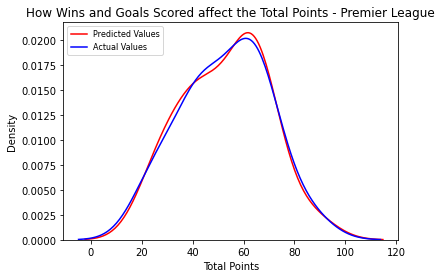

In [1]:
# -*- coding: utf-8 -*-
"""

@author: Roelof
"""

                                    #Data Scraping
#libraries
import requests
from bs4 import BeautifulSoup
url="https://www.skysports.com/premier-league-table/2020"

def getleaguetable(url):
#Get the html
    page=requests.get(url)
#Parse/Work with the data
    soup=BeautifulSoup(page.text,'html.parser')
#Create empty list
    table_list=[]

#Find the table itself/Original source code of table
    league_table=soup.find("table",class_="standing-table__table callfn")

##Scraping, tbody then table rows then table cells(td)-FIND team, wins, draws, losses, points
    for team in league_table.find_all("tbody"):
        rows=team.find_all("tr")
        for row in rows:
            plteams=row.find("td",class_="standing-table__cell standing-table__cell--name").text.strip()
            plwins=row.find_all("td",class_="standing-table__cell")[3].text
            pldraws=row.find_all("td",class_="standing-table__cell")[4].text
            pllosses=row.find_all("td",class_="standing-table__cell")[5].text
            plpoints=row.find_all("td",class_="standing-table__cell")[9].text
#Convert the information into a List
            League_Info = {
                "Teams":plteams,
                "Wins":plwins,
                "Draws":pldraws,
                "Losses":pllosses,
                "Total Points":plpoints,
            }
            table_list.append(League_Info)
    return table_list

data=getleaguetable(url)
print(data)

#Convert list into a dataframe
import pandas as pd
df=pd.DataFrame(data)
#Save dataframe to csv or excel
df.to_csv("PremierLeagueTable 20-21.csv")
df.to_excel("PremierLeagueTable 20-21.xlsx")
print('save to file')



                    #Edit the DataFrame
                 
print(df.head(8))
print(df.tail(2))
print(df.dtypes)

#Rename a Column
df.rename(columns={"Teams":"Premier League Teams"},inplace=True)

#Add a new Column
Goals_Scored=[83,73,68,58,68,62,68,55,62,47,55,46,36,41,47,40,33,27,35,20]
df["Goals_Scored"]=Goals_Scored

#Add a new Column with Categorical values
Region=["North West","North West","North West","London","East Midlands","London","London","London","Yorkshire","North West","West Midlands","North East","West Midlands","London","South East","South East","North West","London","West Midlands","Yorkshire"]
df["Region"]=Region

#Get the number of teams per region
Teams=df.groupby("Region")["Premier League Teams"].sum()
#Perform a statistical summaryof num of teams in each region
Team=df.groupby("Region")["Premier League Teams"]
Team_summary=Team.describe()




                    #Multi Linear Regression Analysis
   
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

X=df[["Wins","Goals_Scored"]]
y=df["Total Points"]

regressor=LinearRegression()
regressor.fit(X,y)
y_pred=regressor.predict(X)

df=pd.DataFrame({"Actual":y,"Predicted":y_pred})
print(df)

#Make Predictions with different variables
Prediction1=regressor.predict([[30,80]])
Prediction2=regressor.predict([[32,86]])
Prediction3=regressor.predict([[40,89]])
Prediction4=regressor.predict([[3,20]])
print("Thirty wins in a season with eighty goals will produce a predicted point total of:", Prediction1)
print("Thirty two wins in a season with eighty six goals will produce a predicted point total of:", Prediction2)
print("Forty wins in a season with eighty nine goals will produce a predicted point total of:", Prediction3)
print("Three wins in a seaon with twenty goals will prodcue a predicted point total of:", Prediction4)


#Create a Distribution plot/hist=False - want a distribution instead of histogram
#Visualise how well model is performing with actual/predicted values
sns.distplot(y_pred,hist=False,color="red",label="Predicted Values")
sns.distplot(y,hist=False,color="blue",label="Actual Values")
plt.title("How Wins and Goals Scored affect the Total Points - Premier League")
plt.legend(loc="upper left",fontsize="8")


#Figure out the Mean_Squared_Error/R2 squared/Slope/Intercept
rmse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)

print("Intercept is:", regressor.intercept_)
print("Slope is:", regressor.coef_)
print("Mean Squared Error is:", rmse)
print("R2 Score is:", r2)
